In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_excel('AW-Bikes_Dataset.xlsx')

In [3]:
dataset.head(2)

,Gender,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AvgMonthSpend,Age,BikeBuyer
0,0,1,3,0,1,81916,50.97,30,1
1,0,1,2,1,2,81076,53.11,45,1


In [4]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [6]:
#Escalado de las variables
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
#Entrenar el modelo K-NN con el train_set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)


accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo=", accuracy)



[[1427  632]
 [ 549 1981]]
Precisión del modelo= 0.7426454565264764


Matriz de Confusión:
[[1427  632]
 [ 549 1981]]


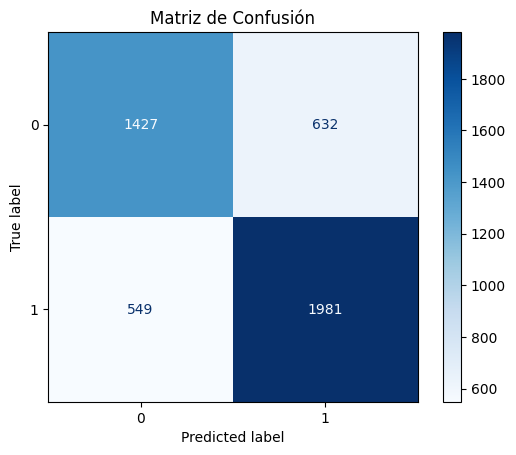

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_estimator(
    classifier,
    X_test,
    y_test,
    cmap=plt.cm.Blues,
    normalize=None,
)
disp.ax_.set_title("Matriz de Confusión")
print("Matriz de Confusión:")
print(disp.confusion_matrix)

plt.show()